# **📌Problem Statement**

The objective of this project is to build a machine learning classification model that predicts student placement outcomes based on academic performance, technical skills, and experiential factors. The model aims to identify key attributes influencing placement decisions and assist institutions in understanding employability trends.

# **🎯Target Feature**

**Placement** – This is the target variable that indicates whether a student is successfully placed or not. It is a binary categorical feature with values Yes (placed) and No (not placed).

### **📂Loading and Understanding Data**

In [ ]:
#importing required libraries
import pandas as pd
import numpy as np
import math

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Loading the dataset
df=pd.read_csv("/content/college_student_placement_dataset.csv")

In [ ]:
df.head()

,College_ID,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement
0,CLG0030,107,6.61,6.28,8,No,8,8,4,No
1,CLG0061,97,5.52,5.37,8,No,7,8,0,No
2,CLG0036,109,5.36,5.83,9,No,3,1,1,No
3,CLG0055,122,5.47,5.75,6,Yes,1,6,1,No
4,CLG0004,96,7.91,7.69,7,No,8,10,2,No


In [ ]:
df.shape

(10000, 10)

In [ ]:
#Checking info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   College_ID              10000 non-null  object 
 1   IQ                      10000 non-null  int64  
 2   Prev_Sem_Result         10000 non-null  float64
 3   CGPA                    10000 non-null  float64
 4   Academic_Performance    10000 non-null  int64  
 5   Internship_Experience   10000 non-null  object 
 6   Extra_Curricular_Score  10000 non-null  int64  
 7   Communication_Skills    10000 non-null  int64  
 8   Projects_Completed      10000 non-null  int64  
 9   Placement               10000 non-null  object 
dtypes: float64(2), int64(5), object(3)
memory usage: 781.4+ KB


In [ ]:
#Checking datatypes of all the columns
df.dtypes

,0
College_ID,object
IQ,int64
Prev_Sem_Result,float64
CGPA,float64
Academic_Performance,int64
Internship_Experience,object
Extra_Curricular_Score,int64
Communication_Skills,int64
Projects_Completed,int64
Placement,object


In [ ]:
df.describe()

,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Extra_Curricular_Score,Communication_Skills,Projects_Completed
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,99.471800,7.535673,7.532379,5.546400,4.970900,5.561800,2.513400
std,15.053101,1.447519,1.470141,2.873477,3.160103,2.900866,1.715959
min,41.000000,5.000000,4.540000,1.000000,0.000000,1.000000,0.000000
25%,89.000000,6.290000,6.290000,3.000000,2.000000,3.000000,1.000000
50%,99.000000,7.560000,7.550000,6.000000,5.000000,6.000000,3.000000
75%,110.000000,8.790000,8.770000,8.000000,8.000000,8.000000,4.000000
max,158.000000,10.000000,10.460000,10.000000,10.000000,10.000000,5.000000


In [ ]:
X.head()

,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed
0,107,6.61,6.28,8,No,8,8,4
1,97,5.52,5.37,8,No,7,8,0
2,109,5.36,5.83,9,No,3,1,1
3,122,5.47,5.75,6,Yes,1,6,1
4,96,7.91,7.69,7,No,8,10,2


## **Observations**

* The dataset contains 10,000 student records with 9 input features and 1 target variable (Placement).

* The target variable Placement is categorical with values Yes / No, making this a binary classification problem.
* The dataset shape is (10000, 10), indicating a sufficiently large dataset for building and evaluating machine learning models.

*   **Categorical Features:** Internship_Experience,Placement

*   **Discrete Numerical Features:** Projects_Completed

*   **Continuous Numerical Features:**
IQ,Prev_Sem_Result,CGPA,Academic_Performance,Extra_Curricular_Score,Communication_Skills

# **🧹Data Cleaning**

In [ ]:
#Dropping the unwanted column College_ID
df=df.drop(columns="College_ID")

In [ ]:
df.head()

,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement
0,107,6.61,6.28,8,No,8,8,4,No
1,97,5.52,5.37,8,No,7,8,0,No
2,109,5.36,5.83,9,No,3,1,1,No
3,122,5.47,5.75,6,Yes,1,6,1,No
4,96,7.91,7.69,7,No,8,10,2,No


In [ ]:
df.shape

(10000, 9)

In [ ]:
#Identifying percentage of null values
df.isnull().sum()/len(df)*100

,0
IQ,0.0
Prev_Sem_Result,0.0
CGPA,0.0
Academic_Performance,0.0
Internship_Experience,0.0
Extra_Curricular_Score,0.0
Communication_Skills,0.0
Projects_Completed,0.0
Placement,0.0


In [ ]:
#Checking the duplicate values
df.duplicated().sum()

np.int64(0)

In [ ]:
#Checking nunique for all columns
for i in df.columns:
  print(i,df[i].nunique())

IQ 104
Prev_Sem_Result 501
CGPA 590
Academic_Performance 10
Internship_Experience 2
Extra_Curricular_Score 11
Communication_Skills 10
Projects_Completed 6
Placement 2


In [ ]:
df['Internship_Experience'].unique()

array(['No', 'Yes'], dtype=object)

## **Distribution and Outlier Analysis of Numerical Features**

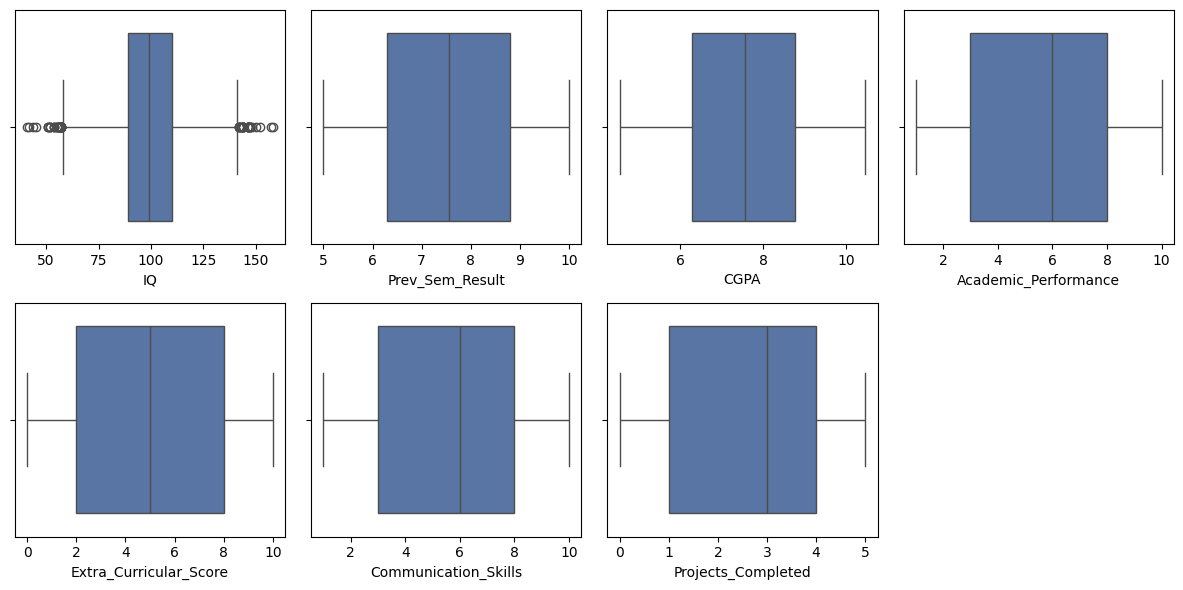

In [ ]:
numerical_cols=df.select_dtypes(include=np.number).columns


n_cols = 4 # plots per row
n_rows = math.ceil(len(numerical_cols) / n_cols)
plt.figure(figsize=(12, 3 * n_rows))

for i, col in enumerate(numerical_cols, 1):
   plt.subplot(n_rows, n_cols, i)
   sns.boxplot(x=df[col], color="#4C72B0")

plt.tight_layout()
plt.show()



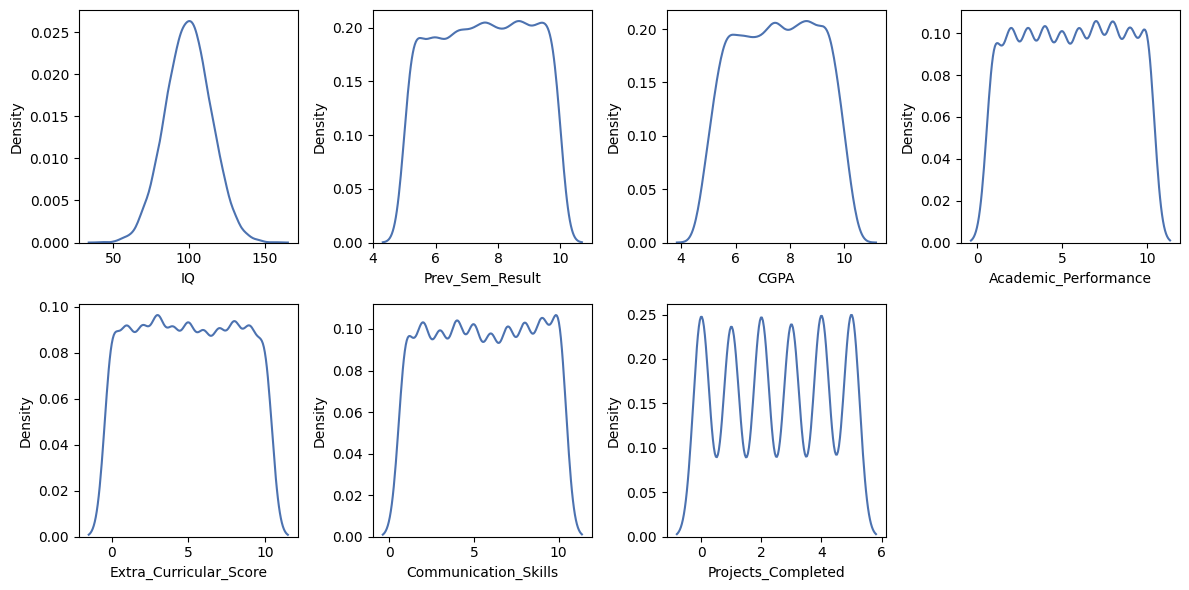

In [ ]:
plt.figure(figsize=(12, 3 * n_rows))

for i, col in enumerate(numerical_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.kdeplot(x=df[col], color="#4C72B0")

plt.tight_layout()
plt.show()

# **Observations**


*  The unwanted column College_ID was dropped
*  The dataset does not contain any missing (null) values, ensuring completeness of information.
*  No duplicate records were found, indicating good data quality.
*  The boxplot for the IQ feature shows the presence of Outliers

# **📈Predictive Modeling and Analysis**

# **Step1 : Selecting Target Variable**

In [ ]:
#Selecting the target variable and predictors
y=df["Placement"]
X=df.drop(columns="Placement")

In [ ]:
print(X.shape)
print(y.shape)

(10000, 8)
(10000,)


# **Step2 : Splitting the data into Train and Test data**

In [ ]:
#Splitting data into X_train,X_test,y_train and y_test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=24)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8000, 8)
(2000, 8)
(8000,)
(2000,)


In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8000 entries, 6604 to 899
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   IQ                      8000 non-null   int64  
 1   Prev_Sem_Result         8000 non-null   float64
 2   CGPA                    8000 non-null   float64
 3   Academic_Performance    8000 non-null   int64  
 4   Internship_Experience   8000 non-null   object 
 5   Extra_Curricular_Score  8000 non-null   int64  
 6   Communication_Skills    8000 non-null   int64  
 7   Projects_Completed      8000 non-null   int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 562.5+ KB


# **Step3 : Data Preprocessing**

In [ ]:
#Lets use columntransformer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer
transformer=ColumnTransformer(transformers=[("t1",OrdinalEncoder(),[4]),("t2",StandardScaler(),[0,1,2,3,5,6,7])],remainder="passthrough")

#fit_transform on train data
X_train_trans=transformer.fit_transform(X_train)

#transform on test data
X_test_trans=transformer.transform(X_test)

In [ ]:
# Let us convert X_train_trans to DataFrame
X_train_trans=pd.DataFrame(X_train_trans,columns=X_train.columns)

# Let us convert X_test_trans to DataFrame
X_test_trans=pd.DataFrame(X_test_trans,columns=X_test.columns)

In [ ]:
X_train_trans.head()

,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed
0,1.0,-0.024792,-1.592960,-1.898928,-1.243852,1.280106,0.833849,-0.302343
1,0.0,1.298336,-1.620626,-1.599426,0.848781,1.598481,-1.583104,-0.886158
2,0.0,-0.620200,0.641040,0.796588,-0.546308,-0.630144,-1.237825,0.281472
3,1.0,1.430649,-1.205641,-1.456482,0.500008,-0.948519,-0.547267,1.449101
4,1.0,0.835241,-1.475381,-1.790018,1.546325,0.643356,1.179128,-0.886158


In [ ]:
X_test_trans.head()

,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed
0,0.0,0.305990,-0.175097,-0.204020,-0.546308,0.324981,-1.237825,-0.302343
1,1.0,0.107521,-1.710539,-1.755984,0.151236,0.961731,-0.547267,-0.886158
2,0.0,1.166024,1.567838,1.204999,-0.895080,-0.311769,1.524407,1.449101
3,0.0,-0.950982,1.194352,0.953146,1.546325,-1.585269,-0.201988,0.281472
4,1.0,-0.487887,1.505591,1.347943,-0.546308,0.961731,0.833849,-1.469973


In [ ]:
X_train_trans.shape

(8000, 8)

In [ ]:
X_test_trans.shape

(2000, 8)

# **Model Building**

## **📍KNN CLASSIFIER**

In [ ]:
#Importing KNN classifier and pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline

# Create a pipeline:
knn = make_pipeline(transformer,KNeighborsClassifier(n_neighbors=5))

#Fitting kNN model
knn.fit(X_train, y_train)


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('t1', OrdinalEncoder(), [4]),
                                                 ('t2', StandardScaler(),
                                                  [0, 1, 2, 3, 5, 6, 7])])),
                ('kneighborsclassifier', KNeighborsClassifier())])

Accuracy Score: 0.955

Confusion Matrix : 
 [[1648   36]
 [  54  262]]

Classfication Report: 
               precision    recall  f1-score   support

          No       0.97      0.98      0.97      1684
         Yes       0.88      0.83      0.85       316

    accuracy                           0.95      2000
   macro avg       0.92      0.90      0.91      2000
weighted avg       0.95      0.95      0.95      2000


Confusion Matrix Display: 


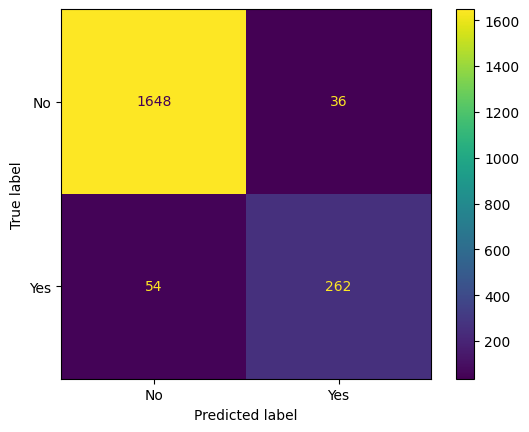

In [ ]:
# Importing evaluation metrics
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import confusion_matrix,classification_report,ConfusionMatrixDisplay

y_pred = knn.predict(X_test)

# Evaluating overall model accuracy
print("Accuracy Score:",accuracy_score(y_test,y_pred))
print()

# Displaying confusion matrix values
print("Confusion Matrix : \n",confusion_matrix(y_test,y_pred))
print()

# Displaying detailed classification report
print("Classfication Report: \n",classification_report(y_test,y_pred))
print()

#Plot confusion matrix for visual understanding
print("Confusion Matrix Display: \n",ConfusionMatrixDisplay.from_predictions(y_test,y_pred))

# Observations

**Model-wise Performance Observations**

The model achieved 95.5% accuracy, reflecting strong predictive performance.

It correctly classified 1,648 non-placed and 262 placed students.

The model produced 36 false positives and 54 false negatives.

**Class-wise Performance Observations**

Not Placed (No): Precision 0.97 and Recall 0.98, indicating excellent identification with minimal errors.

Placed (Yes): Precision 0.88 and Recall 0.83, showing reliable predictions with some missed placed students.

## **🌳DECISIONTREE CLASSIFIER**

#### **Hyperparameter Tuning**

In [ ]:
#Let us implement hyperparameter tuning using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier

tuned_parameters = [{
    "max_depth": list(range(1, 4))
}]

clf_dt = RandomizedSearchCV(
    estimator=DecisionTreeClassifier(),
    param_distributions=tuned_parameters,
    scoring="accuracy",
    cv=5,
    return_train_score=True,
)

clf_dt.fit(X_train_trans, y_train)

# Printing accuracy scores of both train and test data
print(clf_dt.best_params_)
print(clf_dt.score(X_train_trans, y_train))
print(clf_dt.score(X_test_trans, y_test))

/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 3 is smaller than n_iter=10. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


{'max_depth': 3}
0.961375
0.9515


In [ ]:
#Importing DecisionTree classifier
from sklearn.tree import DecisionTreeClassifier

#Creating pipeline and fitting the model
dt=make_pipeline(transformer,DecisionTreeClassifier(max_depth=3))
dt.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('t1', OrdinalEncoder(), [4]),
                                                 ('t2', StandardScaler(),
                                                  [0, 1, 2, 3, 5, 6, 7])])),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(max_depth=3))])

Accuracy Score: 0.9515

Confusion Matrix : 
 [[1610   74]
 [  23  293]]

Classfication Report: 
               precision    recall  f1-score   support

          No       0.99      0.96      0.97      1684
         Yes       0.80      0.93      0.86       316

    accuracy                           0.95      2000
   macro avg       0.89      0.94      0.91      2000
weighted avg       0.96      0.95      0.95      2000


Confusion Matrix Display: 


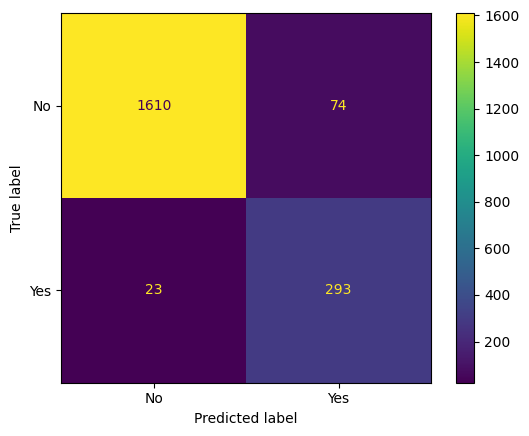

In [ ]:
# Importing evaluation metrics
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import confusion_matrix,classification_report,ConfusionMatrixDisplay

y_pred = dt.predict(X_test)

# Evaluating overall model accuracy
print("Accuracy Score:",accuracy_score(y_test,y_pred))
print()

# Displaying confusion matrix values
print("Confusion Matrix : \n",confusion_matrix(y_test,y_pred))
print()

# Displaying detailed classification report
print("Classfication Report: \n",classification_report(y_test,y_pred))
print()

#Plot confusion matrix for visual understanding
print("Confusion Matrix Display: \n",ConfusionMatrixDisplay.from_predictions(y_test,y_pred))

In [ ]:
# Checking Feature Scaling importance
feature = pd.Series(dt.named_steps['decisiontreeclassifier'].feature_importances_, index = X_train.columns).sort_values(ascending = False)
print(feature)

Academic_Performance      0.405728
Prev_Sem_Result           0.223836
Communication_Skills      0.210167
Projects_Completed        0.160270
CGPA                      0.000000
IQ                        0.000000
Extra_Curricular_Score    0.000000
Internship_Experience     0.000000
dtype: float64


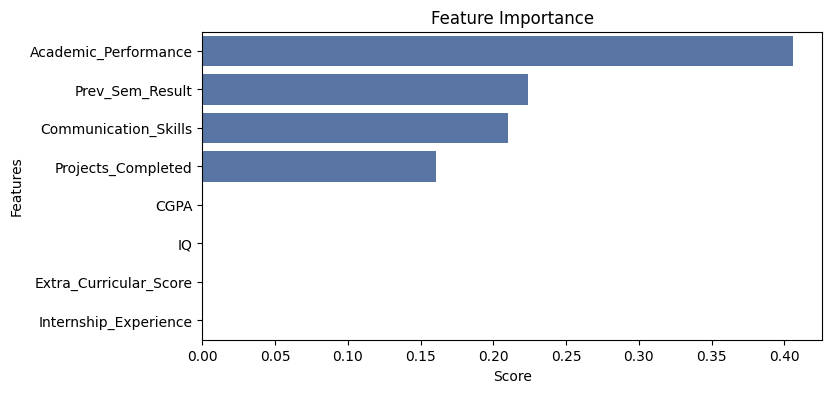

In [ ]:
plt.figure(figsize = (8,4))
sns.barplot(x = feature, y = feature.index,color = '#4C72B0')
plt.title("Feature Importance")
plt.xlabel('Score')
plt.ylabel('Features')
plt.show()

# **Observations**

**Model-wise Performance Observations**

The model achieved 95.15% accuracy, indicating strong overall performance.

It correctly classified 1,610 non-placed and 293 placed students.

The model produced 74 false positives and 23 false negatives.

**Class-wise Performance Observations**

Not Placed (No): Precision 0.99 and Recall 0.96, showing high reliability.

Placed (Yes): Recall 0.93, Precision 0.80, and F1-score 0.86, indicating strong and balanced detection.


## **📊NAIVE_BAYES CLASSIFIER**

In [ ]:
#Importing Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB

#Creating pipeline and fitting the model
nb_model=make_pipeline(transformer,GaussianNB())
nb_model.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('t1', OrdinalEncoder(), [4]),
                                                 ('t2', StandardScaler(),
                                                  [0, 1, 2, 3, 5, 6, 7])])),
                ('gaussiannb', GaussianNB())])

Accuracy Score: 0.903

Confusion Matrix : 
 [[1595   89]
 [ 105  211]]

Classfication Report: 
               precision    recall  f1-score   support

          No       0.94      0.95      0.94      1684
         Yes       0.70      0.67      0.69       316

    accuracy                           0.90      2000
   macro avg       0.82      0.81      0.81      2000
weighted avg       0.90      0.90      0.90      2000


Confusion Matrix Display: 


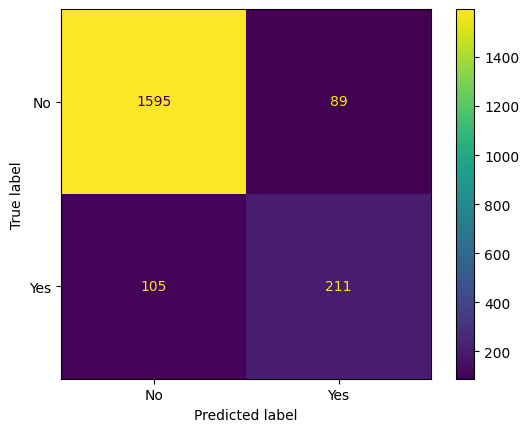

In [ ]:
# Importing evaluation metrics
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import confusion_matrix,classification_report,ConfusionMatrixDisplay

y_pred = nb_model.predict(X_test)

# Evaluating overall model accuracy
print("Accuracy Score:",accuracy_score(y_test,y_pred))
print()

# Displaying confusion matrix values
print("Confusion Matrix : \n",confusion_matrix(y_test,y_pred))
print()

# Displaying detailed classification report
print("Classfication Report: \n",classification_report(y_test,y_pred))
print()

#Plot confusion matrix for visual understanding
print("Confusion Matrix Display: \n",ConfusionMatrixDisplay.from_predictions(y_test,y_pred))

# **Observations**

**Model-wise Performance Observations**

The model achieved an overall accuracy of 90%.

It correctly classified 1,595 non-placed and 211 placed students.

The model produced 89 false positives and 105 false negatives.

**Class-wise Performance Observations**

Not Placed (No): Precision 0.94 and Recall 0.95, showing strong performance for the majority class.

Placed (Yes): Precision 0.70, Recall 0.67, and F1-score 0.69, indicating moderate performance for the minority class.

In [ ]:
#Let us pickle the knn_model
import pickle
with open("knn.pkl","wb") as f:
  pickle.dump(knn,f)

In [ ]:
#Let us pickle the dt_model
import pickle
with open("dt.pkl","wb") as f:
  pickle.dump(knn,f)

# **📝Conclusion**

This project successfully developed a machine learning–based system to predict student placement outcomes using academic, skill-based, and experiential data. Multiple classification models were evaluated using pipeline-based preprocessing to ensure consistent and leakage-free training. Among the models, the Decision Tree classifier delivered the best overall performance, followed closely by KNN, while Naive Bayes served as a baseline model. The final model demonstrates strong predictive capability and is suitable for deployment in real-world placement prediction scenarios.